# Data dependence on g, spectral amplitude (flux) varied

In [1]:
import numpy as np
import random
import time

In [2]:
import sys
import os

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import IPython

In [5]:
import pickle

In [6]:
import swyft

In [7]:
%matplotlib inline

In [8]:
files_name = "simulate_g_values" + "_files"
parent_dir = (os.getcwd()+"/").split('/notebooks/', 1)[0]
start_dir = os.getcwd()
files_dir = os.getcwd() + "/" + files_name 
store_name = files_name.split("_files")[0] + "_store"
store_dir = os.getcwd() + "/" + files_name + "/" + store_name
sys.path.append(files_dir)

In [9]:
from ALP_quick_sim import ALP_sim

In [10]:
with open(files_dir+"/"+'config_objects.pickle', 'rb') as file:
    config_objects = pickle.load(file)
for key in config_objects.keys():
    locals()[key] = config_objects[key]

with open(files_dir+"/"+'sim_objects.pickle', 'rb') as file:
    sim_objects = pickle.load(file)
for key in sim_objects.keys():
    locals()[key] = sim_objects[key]

with open(files_dir+"/"+'obs_objects.pickle', 'rb') as file:
    obs_objects = pickle.load(file) 
for key in obs_objects.keys():
    locals()[key] = obs_objects[key]

In [11]:
stores={}
samples={}
for g in g_values:    
    store = swyft.ZarrStore(store_dir + "/" + store_name + "_" + str(g).replace('.','-'))
    stores[str(g).replace('.','-')] = store
    samples[g] = store
    print('#samples for g='+str(g)+": " + str(len(samples[g])))

#samples for g=-10000000000: 10
#samples for g=-1.9: 10
#samples for g=-1.4: 10
#samples for g=-1.3: 10
#samples for g=-1.1: 10
#samples for g=-1: 10
#samples for g=-0.9: 10
#samples for g=-0.8: 10
#samples for g=-0.7: 10
#samples for g=-0.4: 10
#samples for g=-0.3: 10
#samples for g=-0.2: 10
#samples for g=0: 10
#samples for g=0.1: 10
#samples for g=0.2: 10
#samples for g=0.3: 10
#samples for g=0.4: 10
#samples for g=0.5: 10
#samples for g=0.7: 10
#samples for g=0.8: 10
#samples for g=1: 10
#samples for g=1.2: 10
#samples for g=1.4: 10
#samples for g=1.8: 10
#samples for g=2: 10


# Visualize observations

Generating new null-hypothesis... 

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


done.


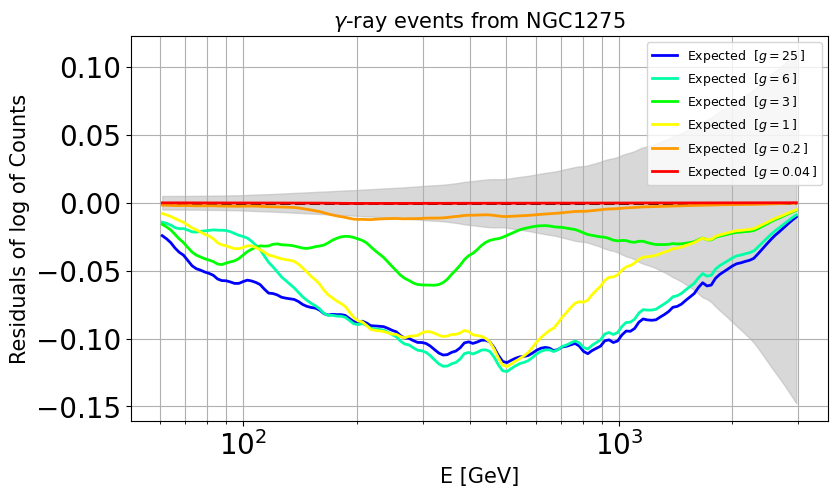

In [12]:
A.configure_plot(xmin = None, xmax = None, ymin=None, ymax=None, logx=1, legend = 1)
A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=0)   
for i,tru in enumerate(truths):
        A.configure_model(params=tru, ALP_seed=0)
        A.compute_case(new_fig=0,plot_obs=0,color=colors[i], color_obs=colors[i],label_exp=1, errorbands=False)
A.configure_model(ALP_seed=None)

# Compare signals to posterior width

In [78]:
widths =[
    [0.1,0.7,2,1.4],
    [-0.9,-0.4,0.3,0.8,1.2,1.8],              #3sig,2sig,peak,truth,2sig,3sig
    [-1.3,-1,-0.2,0.4,0.5,1.2],
    [-1.1,-0.8,0.2,0.,1.,1.4],
    [g_values[0],g_values[0],-1.4, -0.7,-0.7,-0.3],
    [g_values[0],g_values[0],-1.9,-1.4,-0.8,-0.4],
]

colors_widths = [
    (.6,0,0),
    (.6,.2,0),
    (0,.5,.0),
    (0,0,0),
    (0,.4,.6),
    (0,0,.6),
]

transparency = 0.5

logx = 0
logy = 1

In [79]:
widths[3][3]

0.0

In [124]:
def comparisons(which_truth,n=8):
    figs ={}
    A.configure_plot(xmin = None, xmax = None, ymin=None, ymax=None, logx=1, legend = 1) 
    for j,width in enumerate(widths[which_truth:which_truth+1]):
        for i, g in enumerate(width):
            figs[i], _ = plt.subplots(1,2, figsize = (15,4))
            A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=0, axes=figs[i].axes[0])
            for k in range(n):
                A.configure_model(params=samples[g]['params'][k])
                A.import_counts(obs=samples[g]['data'][k],exp=samples[g]['exp'][k])
                A.compute_case(new_fig=0,new_counts=0,plot_obs=0,color=colors_widths[i],
                               label_exp=int(not k), errorbands=False, transparency = transparency, axes=figs[i].axes[0])
                figs[i].axes[1].plot(abs(np.fft.fft(A.counts_exp['y']))[:75],color=colors_widths[i], alpha=0.5)
            obs = observations[which_truth]
            A.import_counts(obs=obs['data'],exp=obs['exp'])
            A.configure_model(params=obs['params'])
            A.compute_case(new_fig=0,new_counts=0,color=colors[which_truth],linestyle="-",label_exp=1,
                           errorbands=0, errors=0, plot_obs=0, axes=figs[i].axes[0])
            figs[i].axes[1].plot(abs(np.fft.fft(A.counts_exp['y']))[:75],color=colors[which_truth])
            if logx: figs[i].axes[1].set_xscale("log")
            if logy: figs[i].axes[1].set_yscale("log")
            figs[i].axes[1].set_ylabel('$|F_k|^2$',size=A.fontsize)
            figs[i].axes[1].set_xlabel('Bin number',size=A.fontsize)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


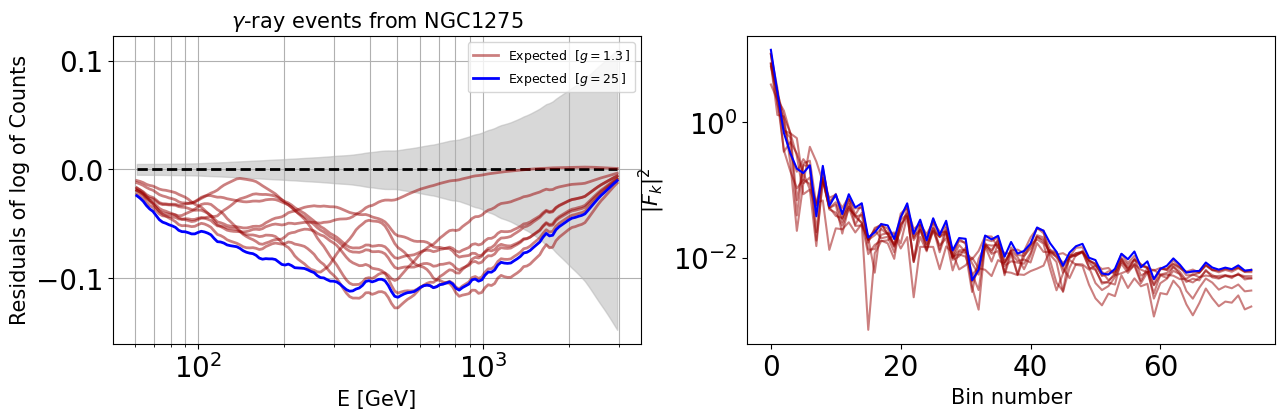

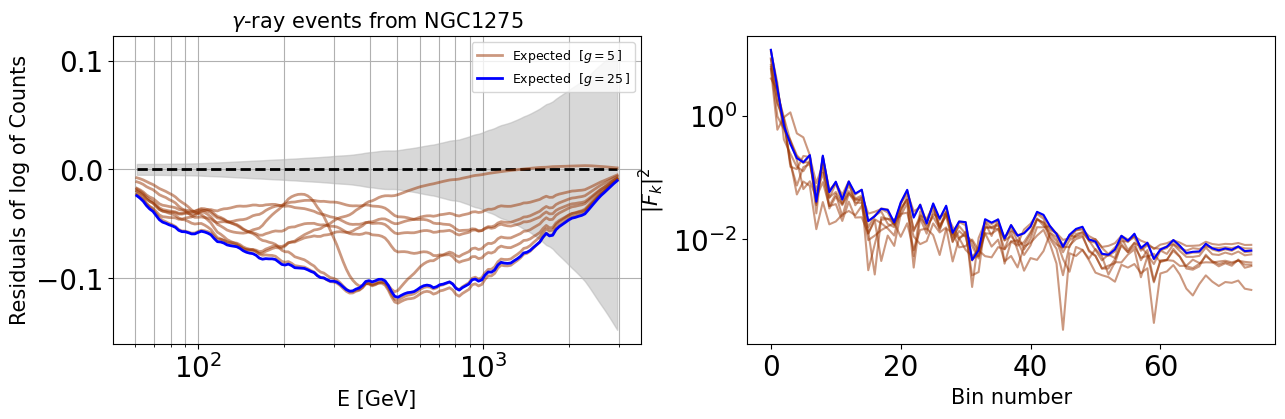

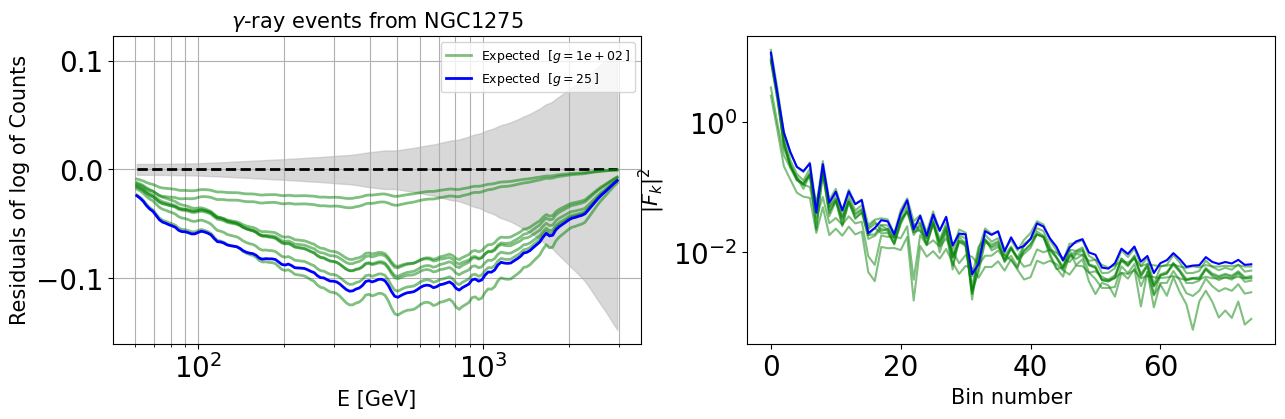

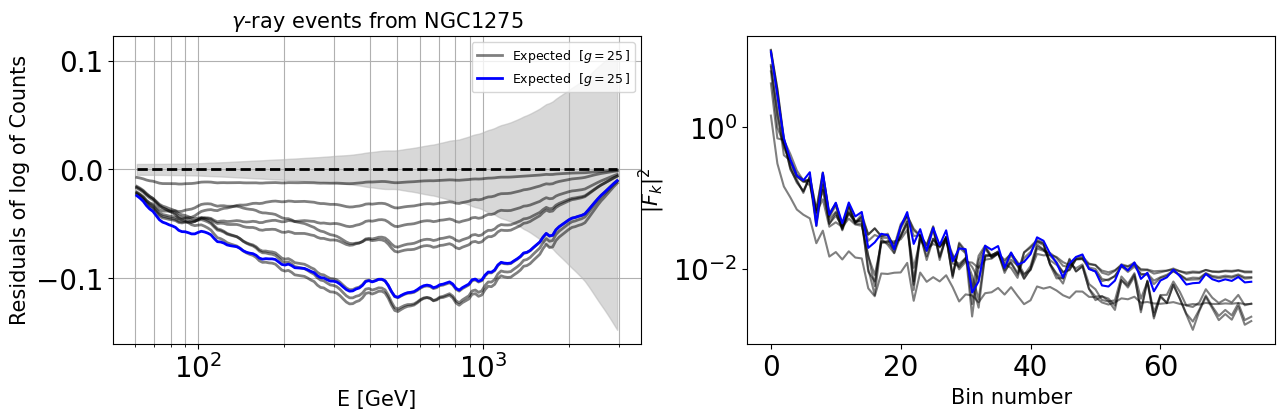

In [125]:
comparisons(0)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

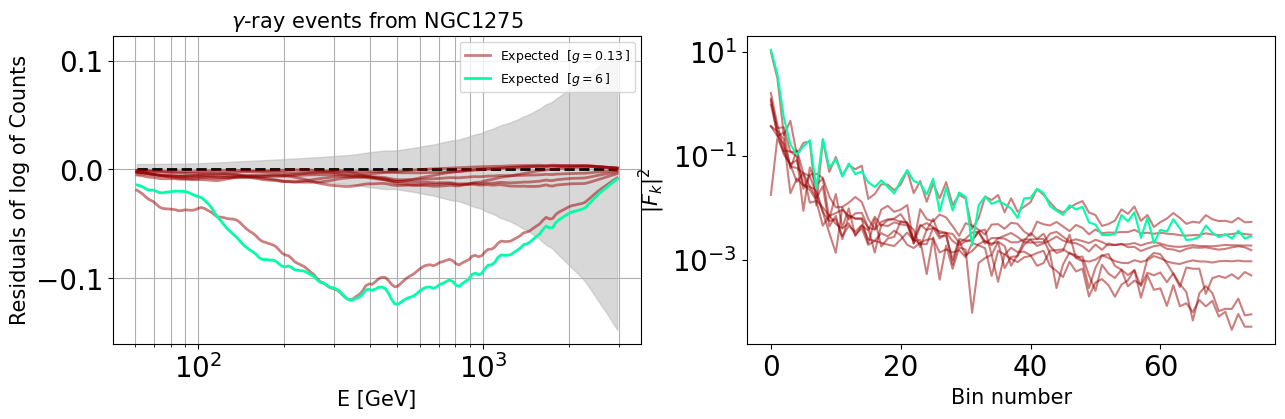

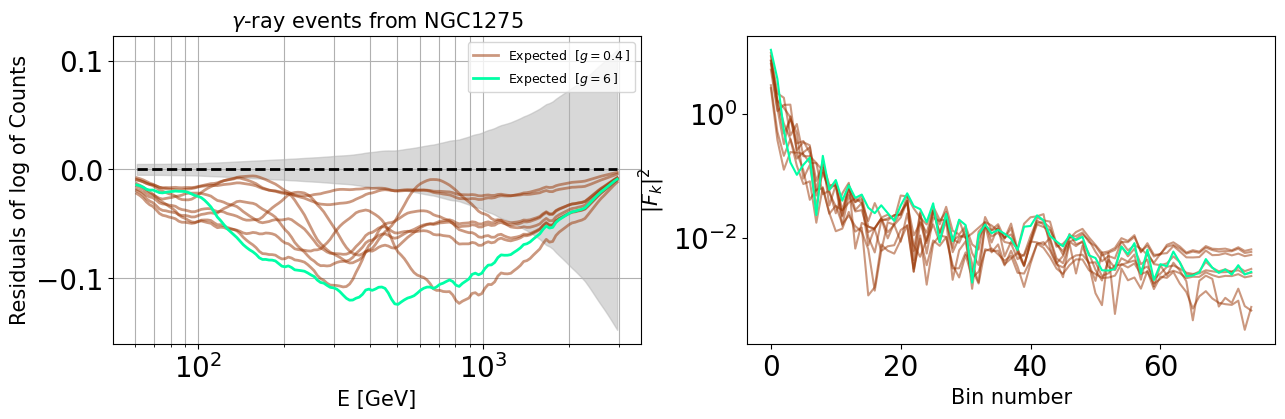

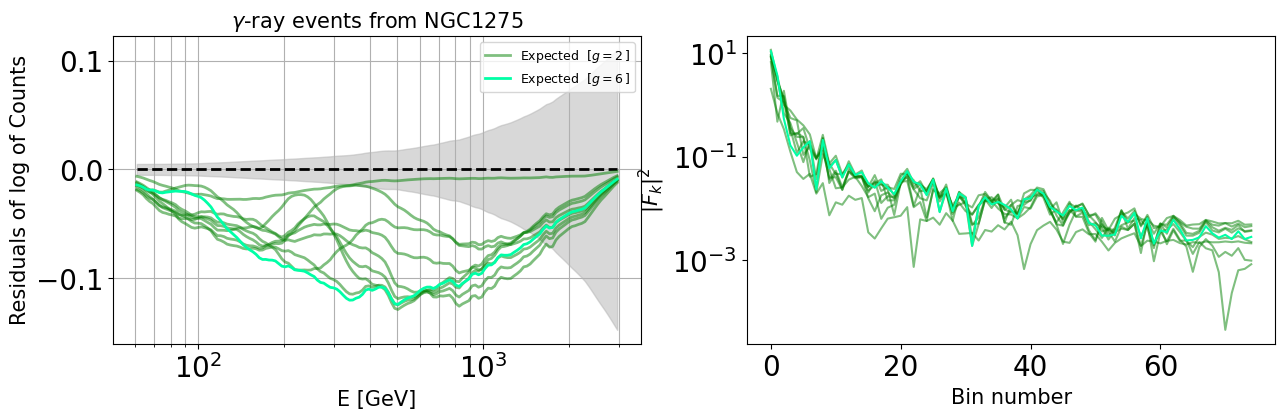

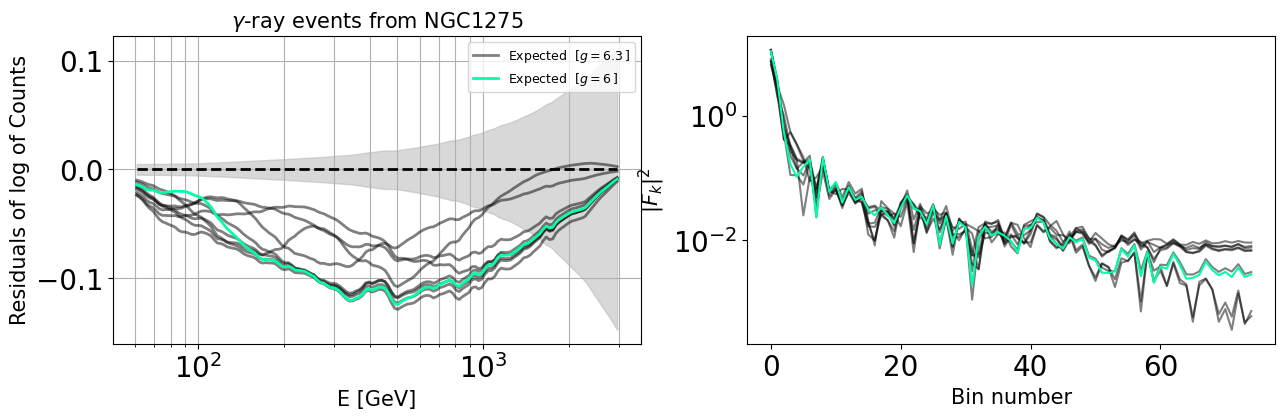

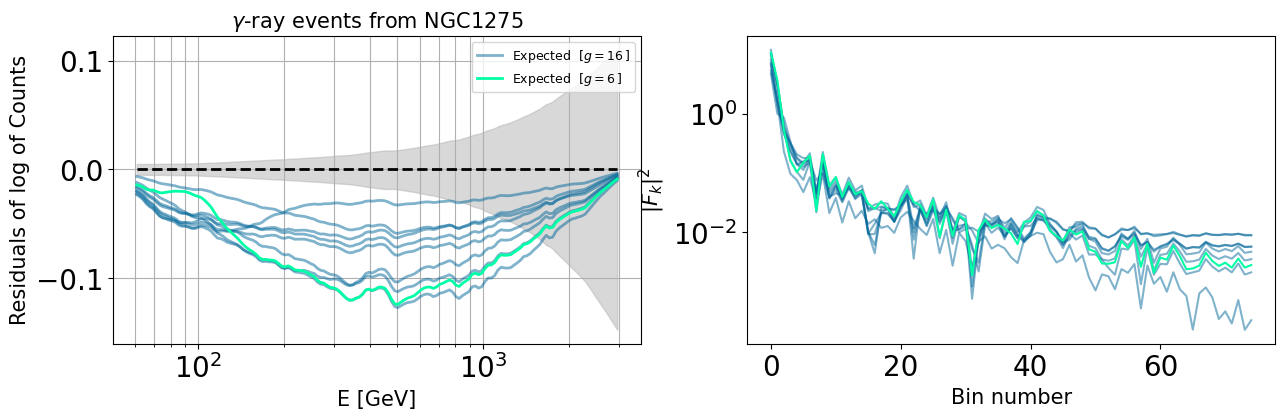

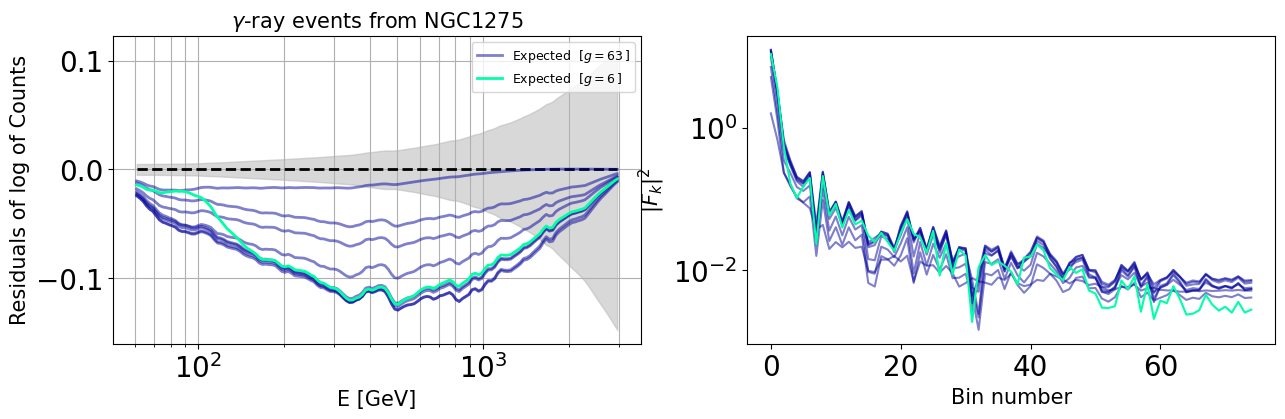

In [126]:
comparisons(1)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

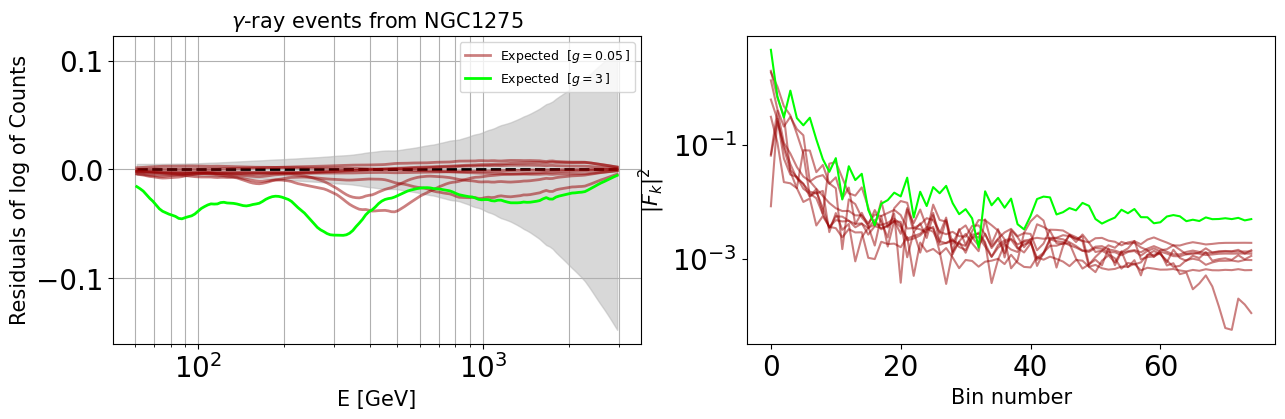

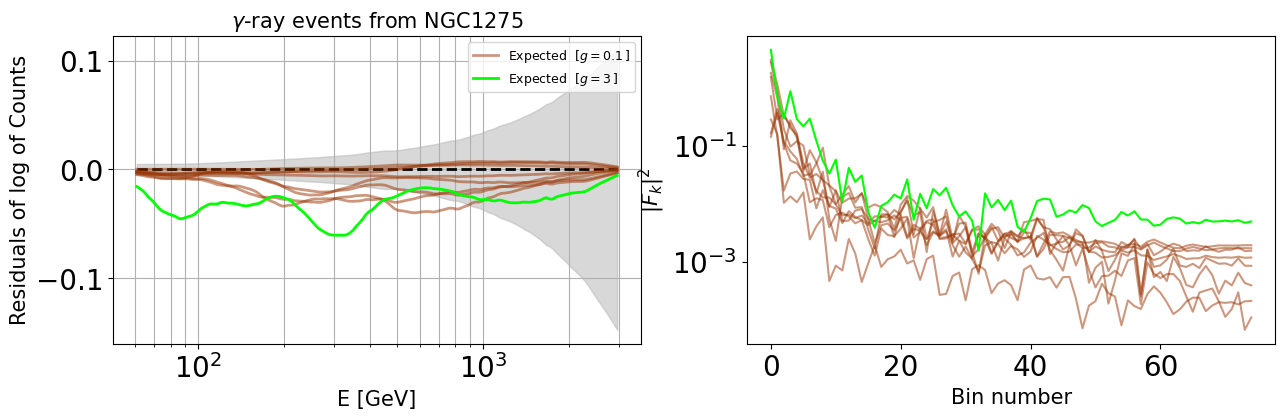

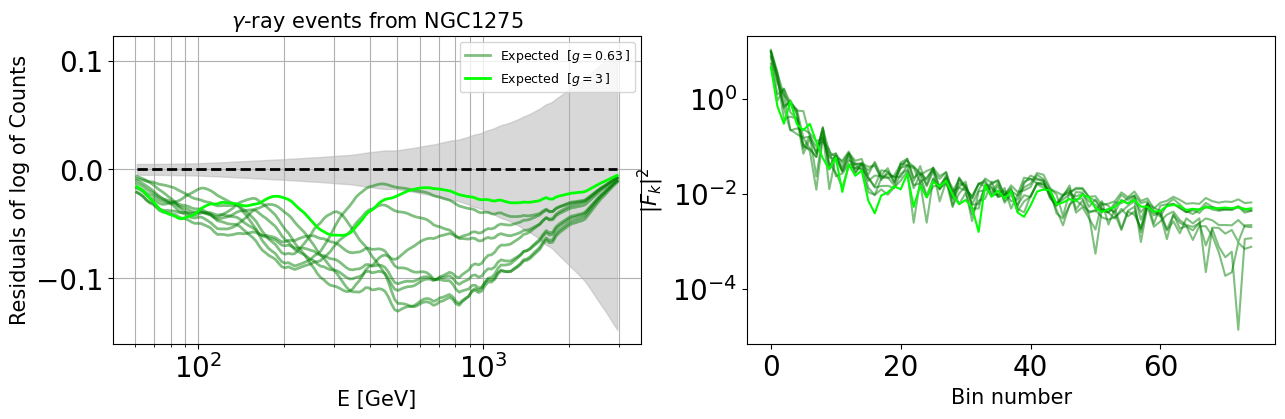

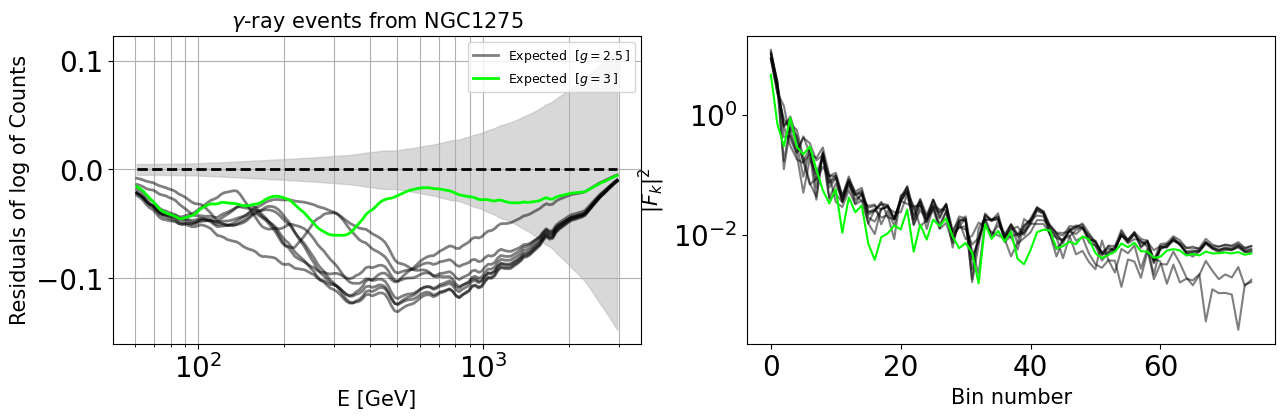

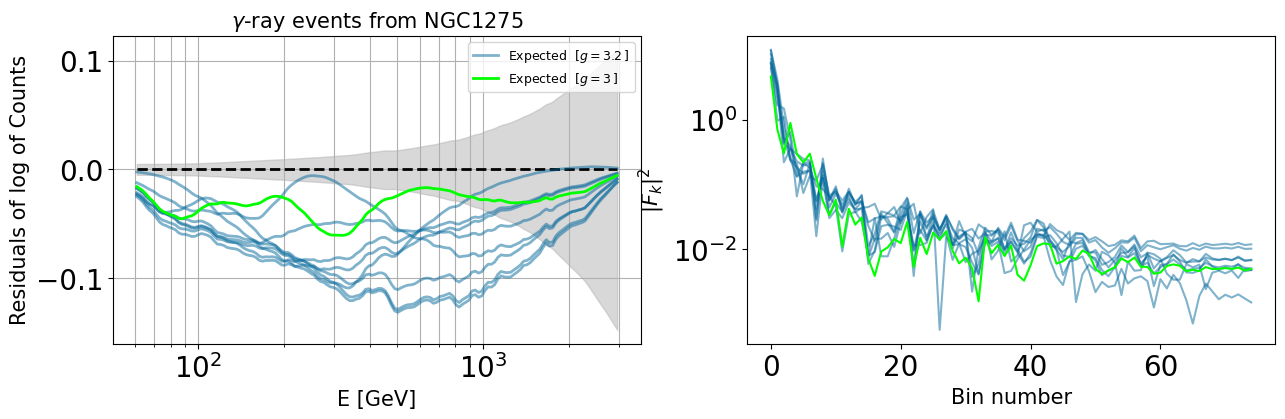

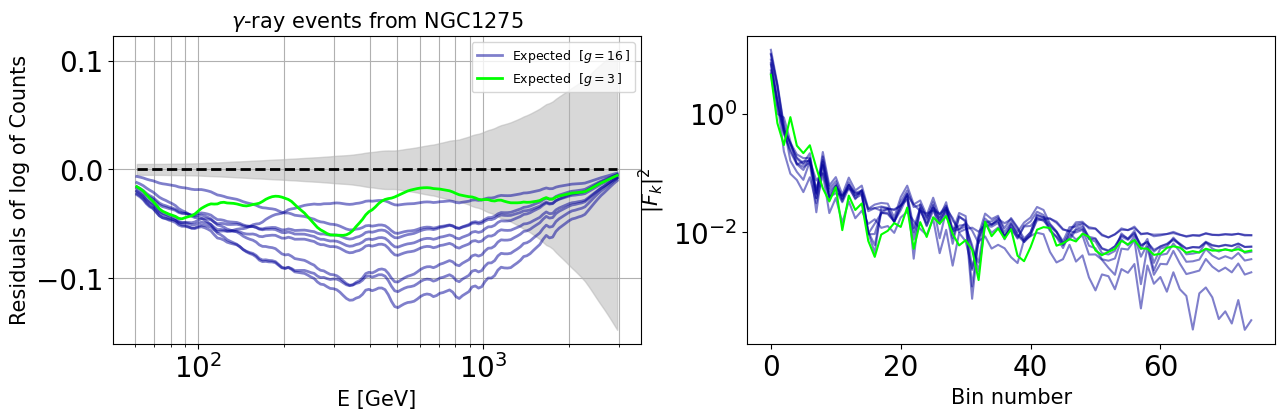

In [127]:
comparisons(2)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

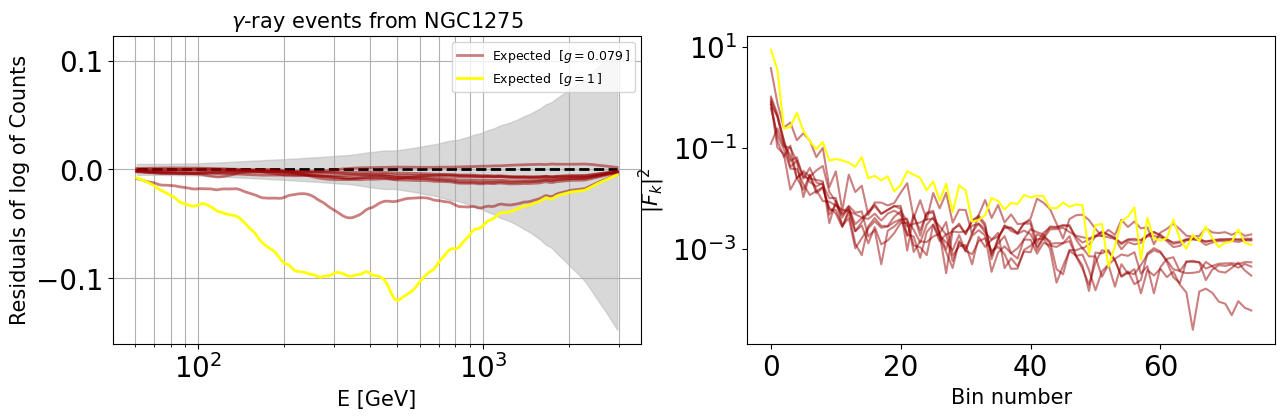

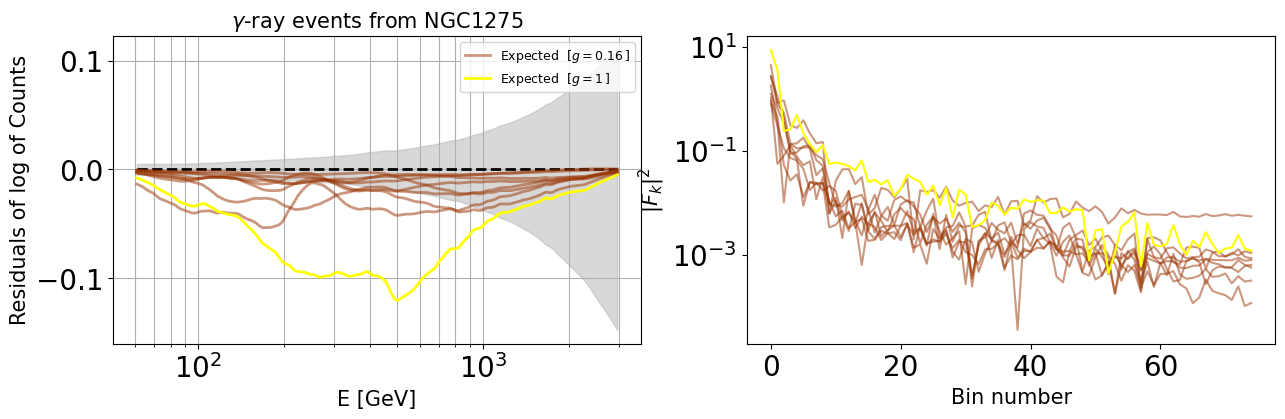

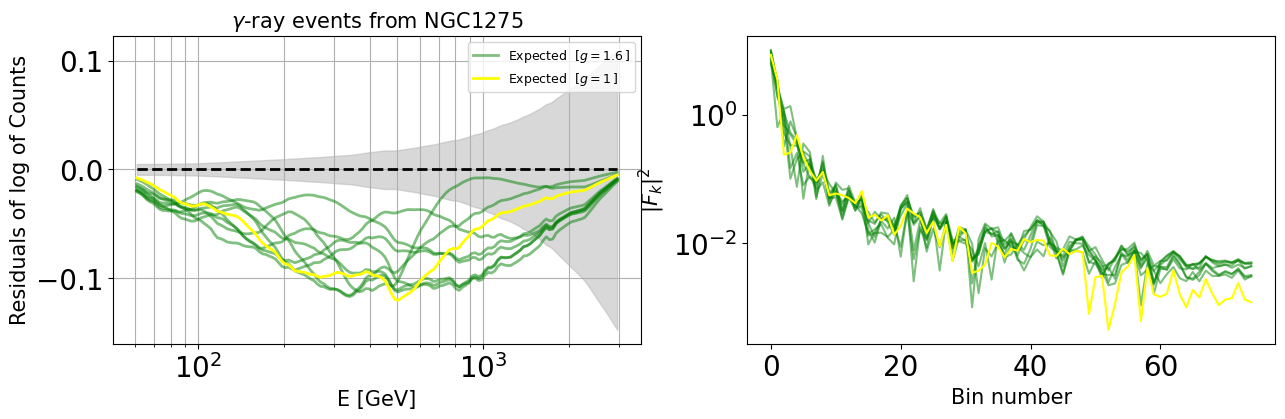

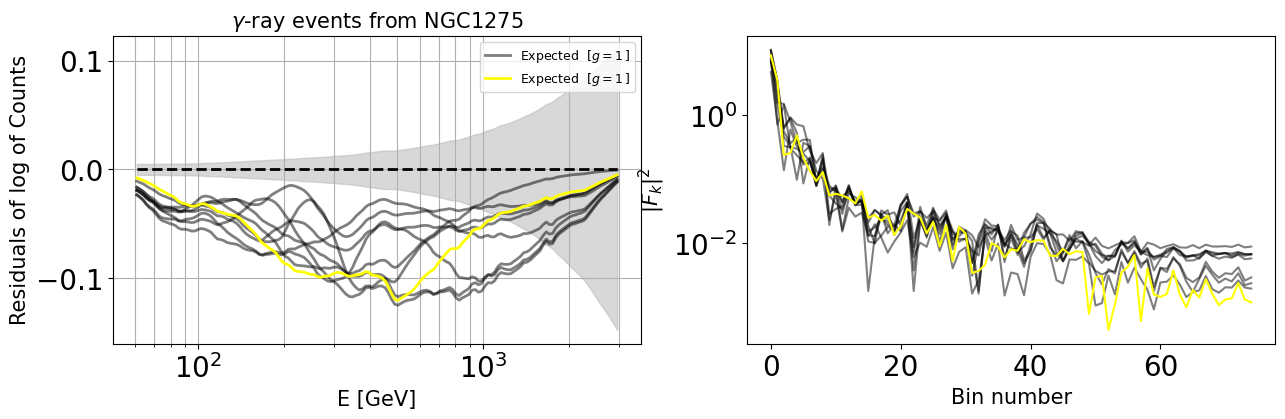

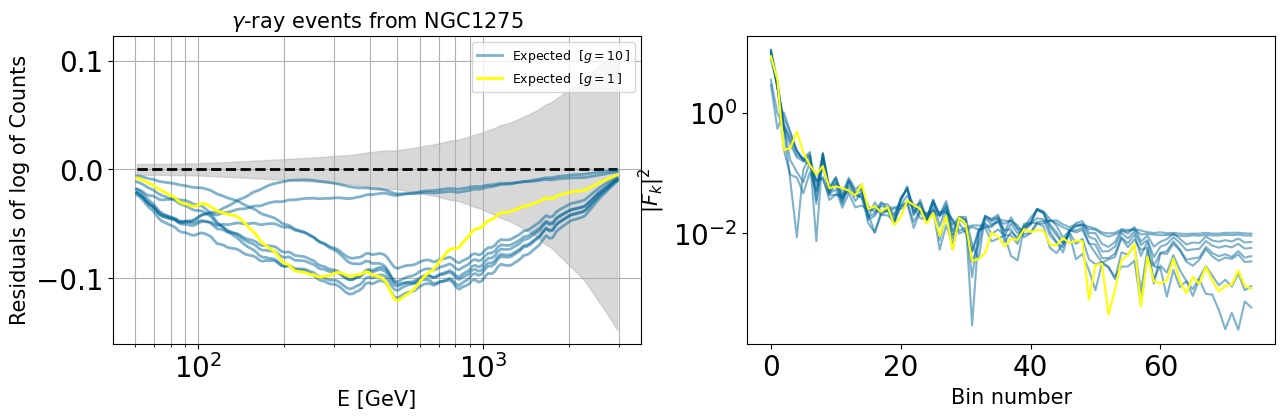

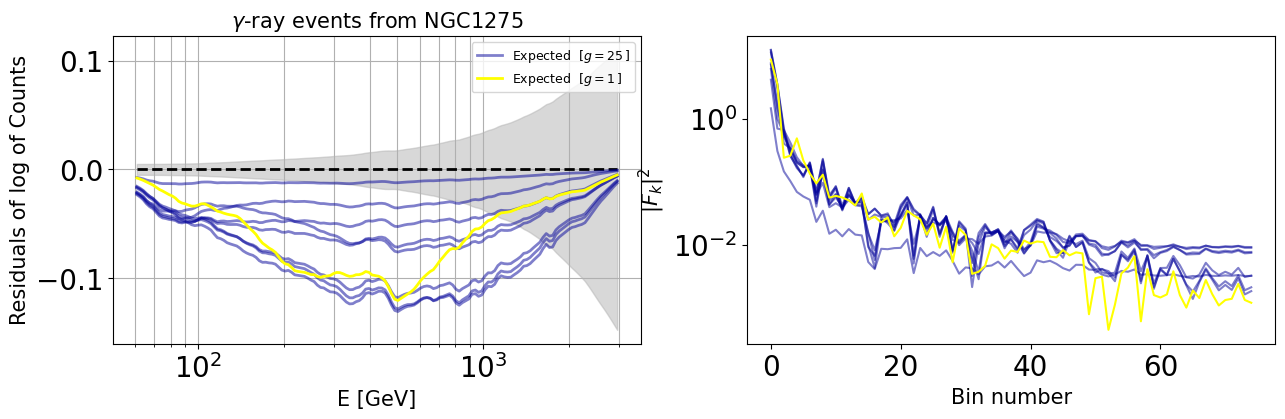

In [128]:
comparisons(3)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

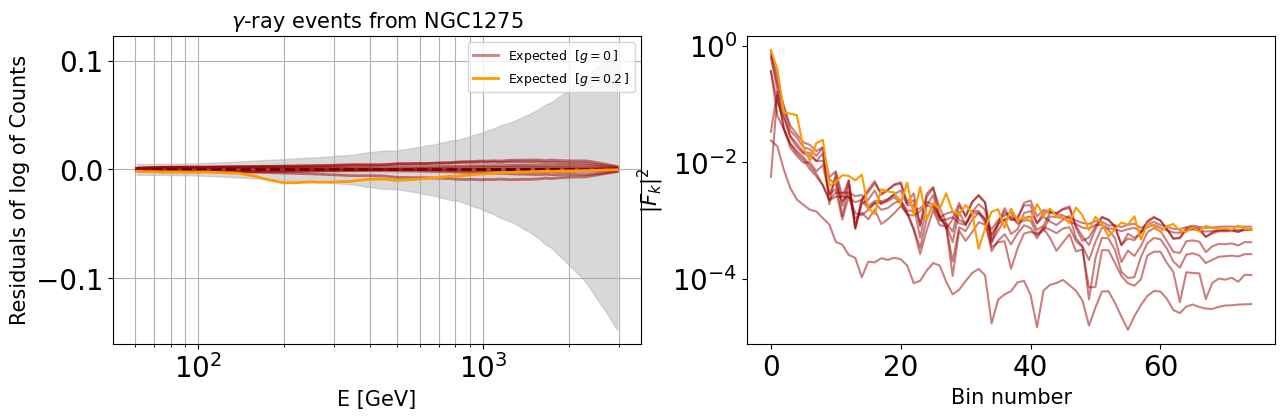

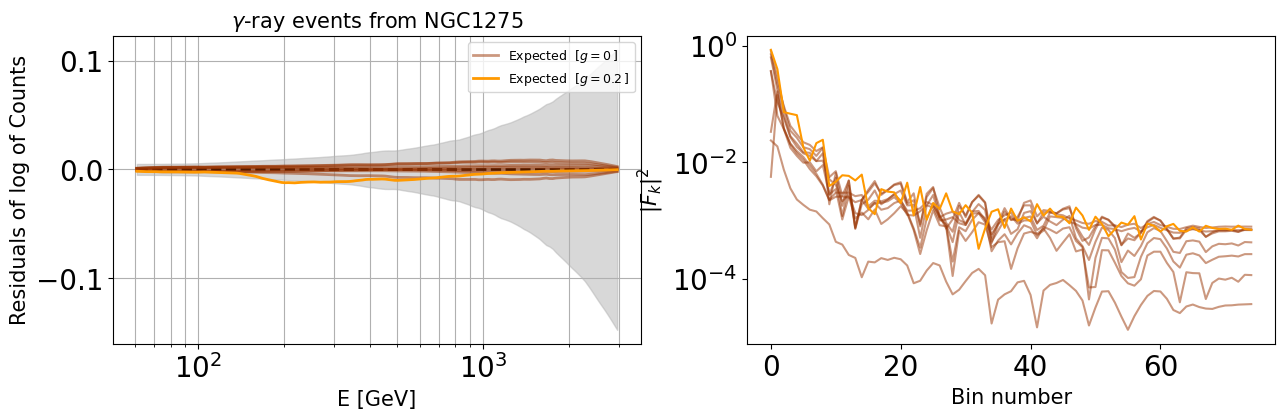

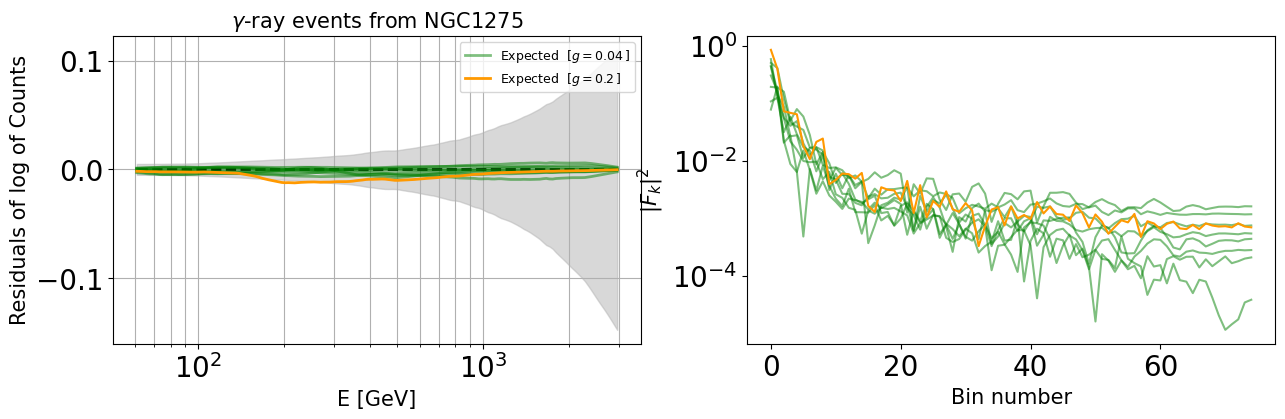

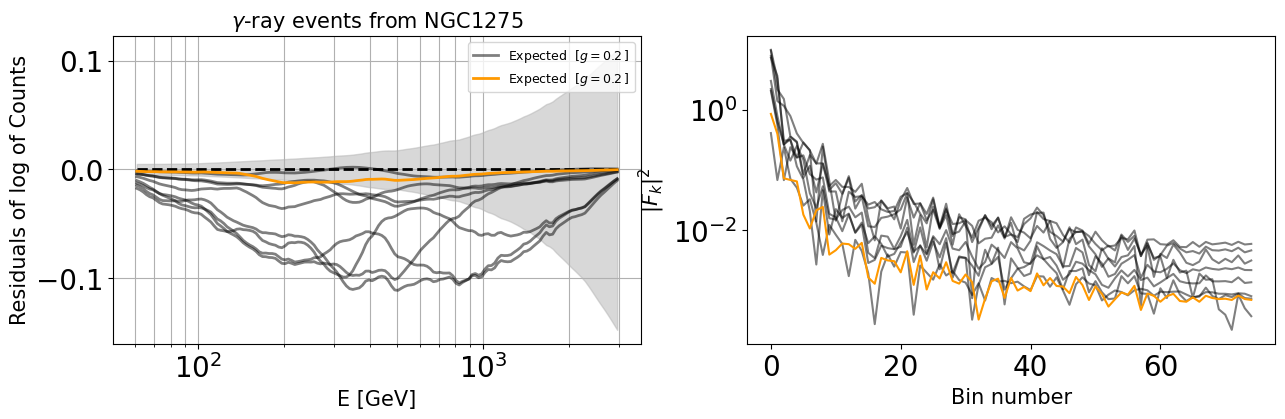

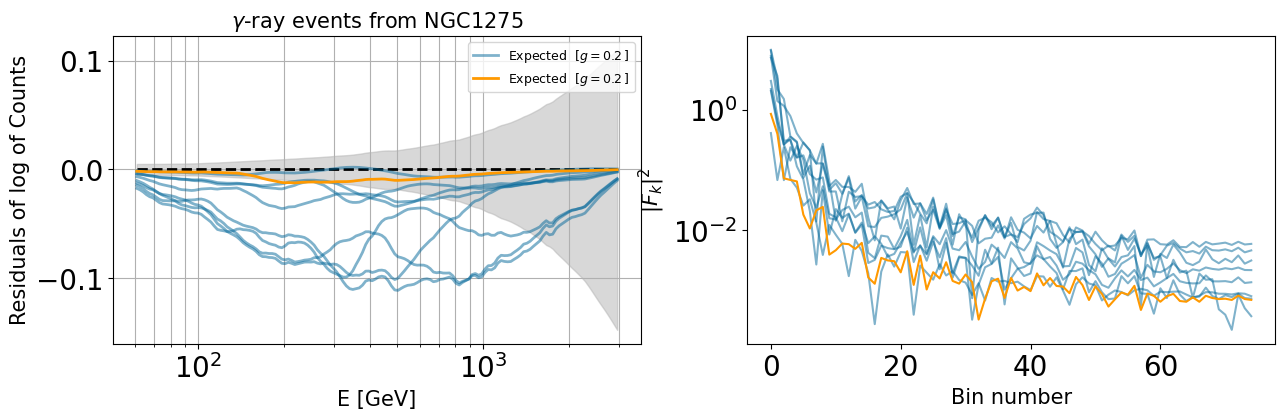

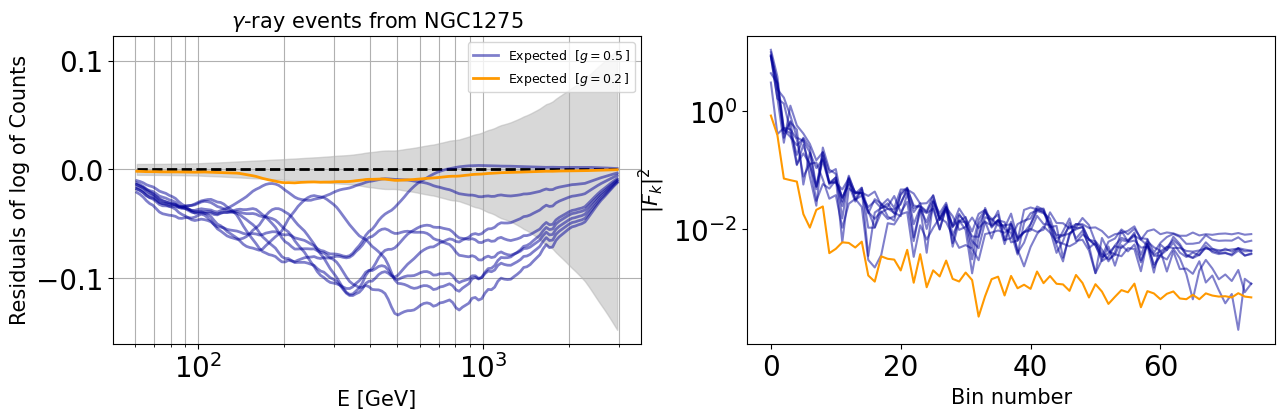

In [129]:
comparisons(4)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

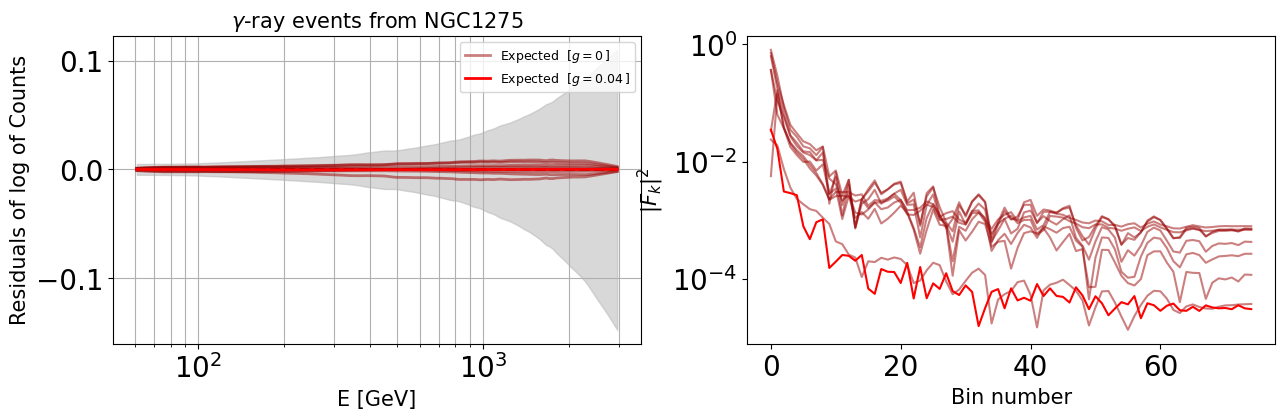

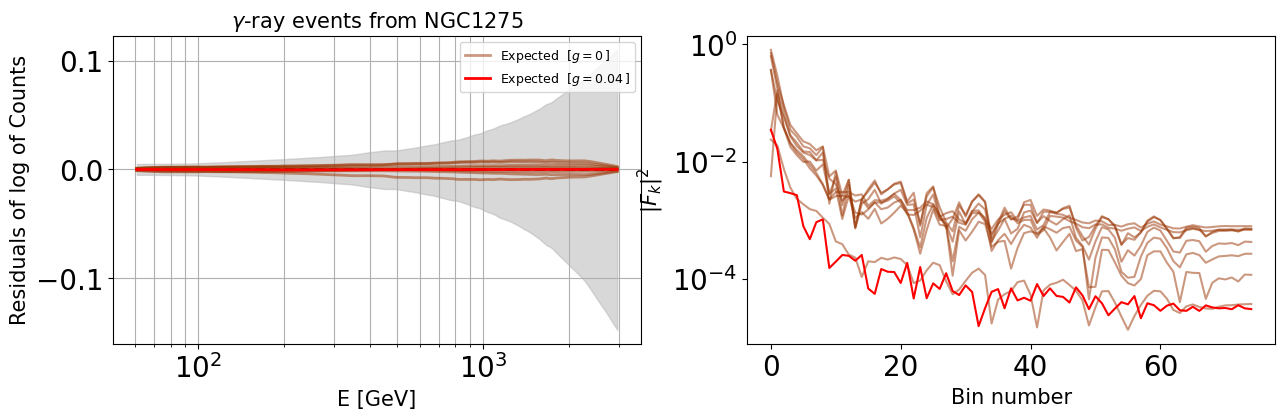

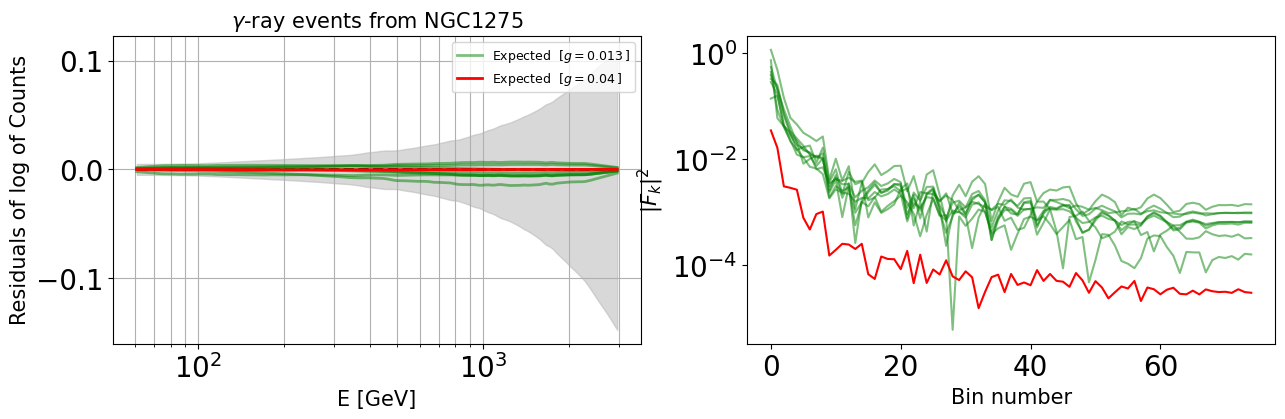

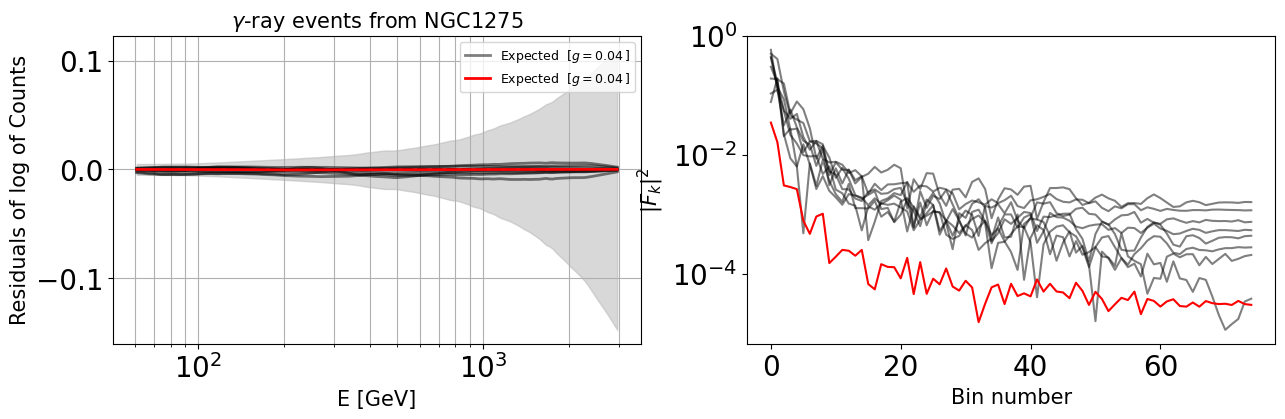

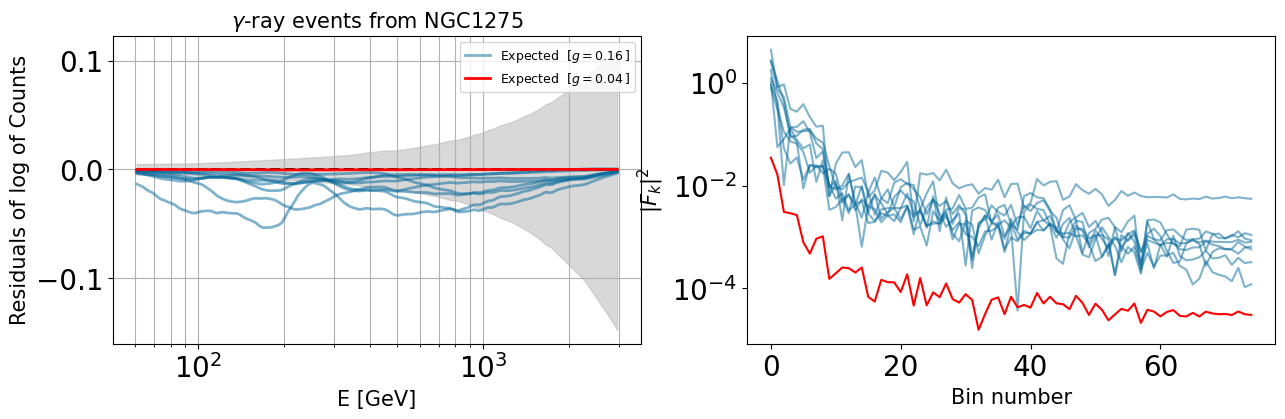

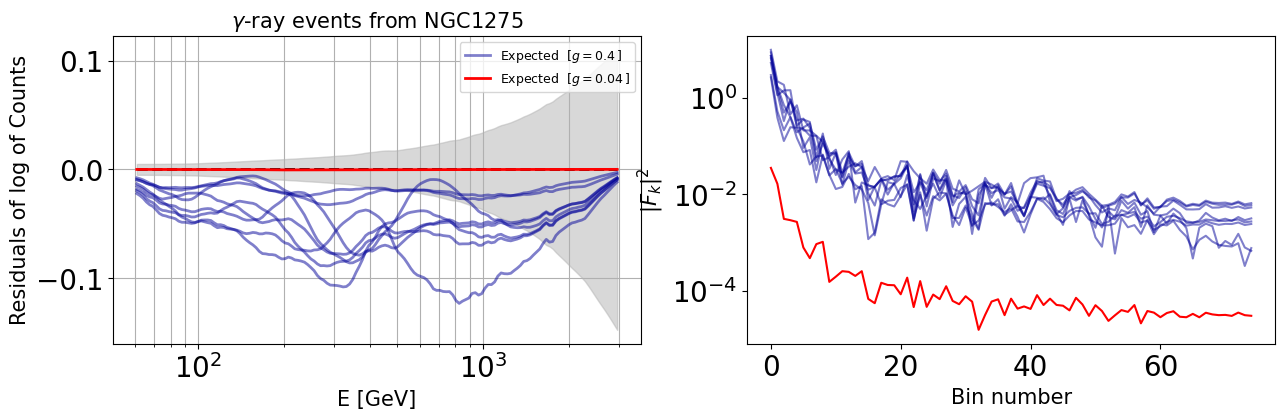

In [130]:
comparisons(5)

In [138]:
stuff = np.linspace(0,200,150)

In [139]:
stuff_pois = np.random.poisson(stuff)

In [140]:
stuff_pois

array([  0,   1,   7,   6,   8,   6,  11,  12,  10,  15,  24,  12,  12,
        19,  15,  14,  23,  20,  24,  19,  34,  33,  26,  38,  29,  24,
        45,  38,  39,  50,  37,  41,  48,  44,  50,  50,  53,  47,  58,
        61,  49,  47,  67,  56,  60,  67,  67,  59,  69,  60,  52,  73,
        70,  61,  77,  75,  82,  67,  52,  90,  83, 102,  89,  84,  88,
        99,  79, 101,  91,  89,  97,  88,  97,  83,  92,  96,  99,  95,
       103, 126, 105,  95, 103, 116, 103, 116, 116,  97, 119, 116, 138,
       115, 116, 140, 112, 134, 104, 128, 133, 137, 137, 137, 139, 123,
       134, 130, 143, 120, 148, 136, 159, 143, 152, 156, 129, 161, 170,
       176, 147, 146, 150, 169, 168, 167, 158, 160, 176, 179, 159, 166,
       165, 168, 169, 166, 187, 175, 207, 181, 205, 174, 181, 156, 181,
       187, 205, 186, 186, 197, 220, 179])

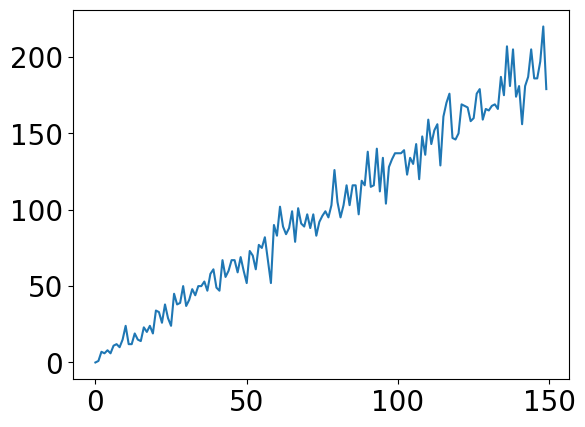

In [141]:
plt.plot(stuff_pois)

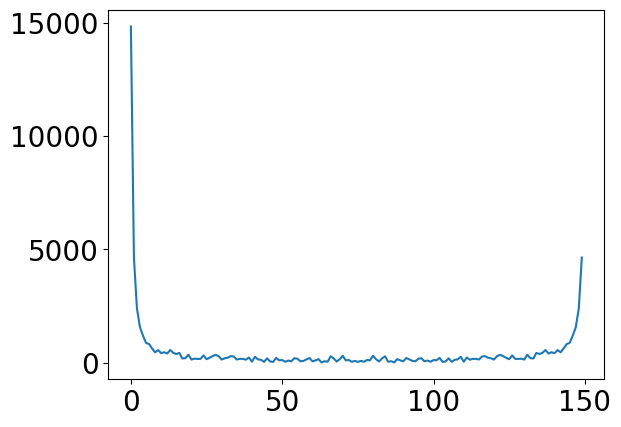

In [156]:
plt.plot(abs(np.fft.fft(stuff_pois)))

In [143]:
abs(np.fft.fft(stuff_pois))

array([1.48400000e+04, 4.64451709e+03, 2.39503684e+03, 1.56531074e+03,
       1.19463415e+03, 8.78824994e+02, 8.25379216e+02, 6.32390157e+02,
       4.62557885e+02, 5.60524543e+02, 4.22838741e+02, 4.66002647e+02,
       4.08171389e+02, 5.64774116e+02, 4.39102057e+02, 3.86927316e+02,
       4.35574787e+02, 1.89547380e+02, 2.04018343e+02, 3.55395291e+02,
       1.43037498e+02, 1.81998840e+02, 1.70803421e+02, 1.71232871e+02,
       3.25885671e+02, 1.59502351e+02, 2.18985967e+02, 2.94673869e+02,
       3.50309614e+02, 2.91948076e+02, 1.42107690e+02, 1.97998260e+02,
       2.24898457e+02, 2.93188646e+02, 2.73836850e+02, 1.43941486e+02,
       1.74264973e+02, 1.73694009e+02, 1.36717331e+02, 2.32841077e+02,
       4.77679295e+01, 2.64659206e+02, 1.49440658e+02, 1.31546519e+02,
       4.17318049e+01, 1.96589043e+02, 5.80016484e+01, 4.06390953e+01,
       2.17772832e+02, 1.08976193e+02, 1.21024791e+02, 4.50779949e+01,
       9.92386253e+01, 6.63069516e+01, 2.00311056e+02, 1.80195009e+02,
      

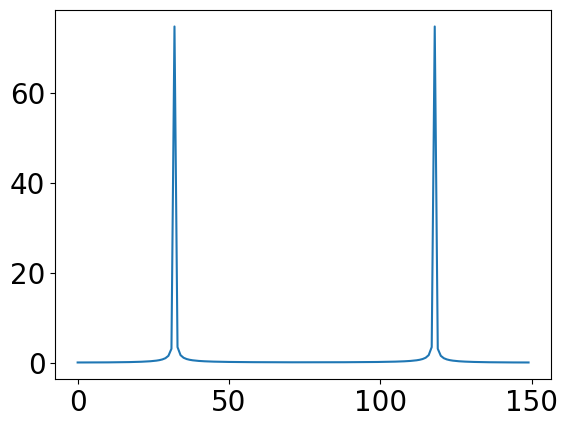

In [158]:
plt.plot(abs(np.fft.fft(np.sin(2*stuff/2))))

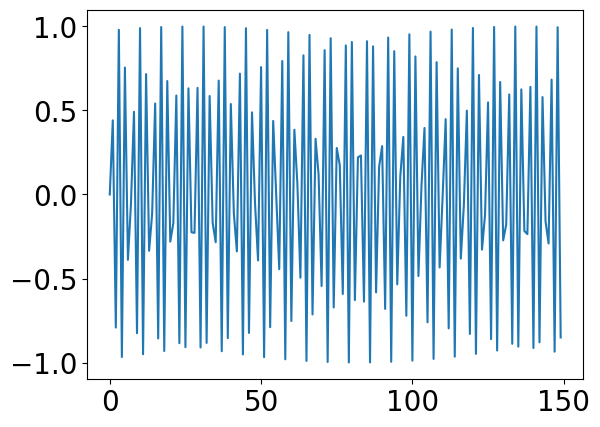

In [157]:
plt.plot(np.sin(2*stuff))

In [153]:
np.sin(stuff/2)

array([ 0.        ,  0.62187988,  0.97400399,  0.90362982,  0.44128389,
       -0.21247983, -0.77407517, -0.99989629, -0.79198768, -0.24053486,
        0.4152559 ,  0.89091916,  0.98012422,  0.64417619,  0.02880082,
       -0.59906761, -0.96707567, -0.91559077, -0.46694575,  0.18424852,
        0.75552045,  0.99906671,  0.80924311,  0.26839032, -0.3888834 ,
       -0.87746934, -0.98543128, -0.66593806, -0.05757775,  0.57575833,
        0.95934501,  0.92679209,  0.49222021, -0.15586434, -0.73633889,
       -0.99740826, -0.82582715, -0.29602312,  0.36218826,  0.86329152,
        0.98992077,  0.68714742,  0.08630691, -0.55197136, -0.95081841,
       -0.9372245 , -0.5170863 ,  0.12735085,  0.71654643,  0.99492229,
        0.84172603,  0.32341031, -0.33519262, -0.84839747, -0.99358896,
       -0.70778669, -0.11496446,  0.52772644,  0.94150297,  0.94687932,
        0.54152338, -0.09873171, -0.69615947, -0.99161087, -0.85692656,
       -0.35052918,  0.30791889,  0.83279953,  0.99643281,  0.72

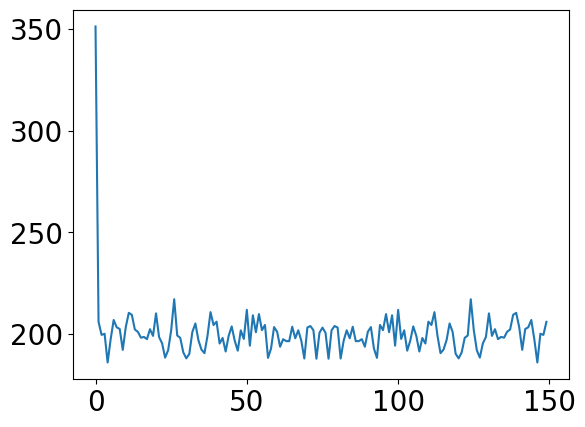

In [121]:
plt.plot(abs(np.fft.ifft(abs(np.fft.fft(stuff_pois)))))